In [1]:
pip install qiskit torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.5 MB/s eta 0:00:00


In [2]:
!pip install qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.3 MB/s eta 0:00:00


In [3]:
!pip install qiskit-aer --upgrade


In [4]:
!pip install qiskit-aer
from qiskit_aer import Aer

print(Aer.backends())

[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


In [5]:
!pip install qiskit torch
!pip install qiskit-aer
!pip install qiskit-aer --upgrade

from qiskit import QuantumCircuit, transpile
from qiskit.primitives import StatevectorSampler
from qiskit_aer import AerSimulator
import numpy as np

# Quantum Circuit Simulation
def create_quantum_circuit(theta):
    """
    Create a simple quantum circuit with a rotation.
    :param theta: Rotation angle for the qubit.
    """
    qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
    qc.rx(theta, 0)  # Applying rotation around the X-axis with angle theta
    qc.measure(0, 0)  # Measuring the qubit into the classical bit
    return qc

def simulate_quantum_circuit(theta):
    """
    Simulate the quantum circuit with the given rotation.
    :param theta: Rotation angle for the qubit.
    :return: Measurement result probability (0 or 1).
    """
    qc = create_quantum_circuit(theta)


    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    job = simulator.run(compiled_circuit, shots=1000)
    result = job.result()
    counts = result.get_counts(qc)


    total_shots = sum(counts.values())
    probability_of_1 = counts.get('1', 0) / total_shots if total_shots else 0
    return probability_of_1

# Testing the quantum simulation
theta = np.pi / 4  # Example rotation angle
probability = simulate_quantum_circuit(theta)
print(f"Probability of measuring |1⟩: {probability}")

Probability of measuring |1⟩: 0.144


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim


class QuantumCircuitPredictor(nn.Module):
    def __init__(self):
        super(QuantumCircuitPredictor, self).__init__()
        self.fc1 = nn.Linear(1, 16)  # Input layer with 1 feature (theta)
        self.fc2 = nn.Linear(16, 16)  # Hidden layer
        self.fc3 = nn.Linear(16, 1)   # Output layer (predicted probability)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Output between 0 and 1 (probability)
        return x


model = QuantumCircuitPredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model to match quantum simulation outputs
def train_model(model, target_probability, theta_values, epochs=100):
    """
    Train the model to predict the probability from quantum circuit simulation.
    :param model: Neural network model.
    :param target_probability: Target probability we want the quantum circuit to achieve.
    :param theta_values: Range of theta angles to train the model on.
    :param epochs: Number of training epochs.
    """
    for epoch in range(epochs):
        total_loss = 0
        for theta in theta_values:
            optimizer.zero_grad()
            theta_tensor = torch.tensor([[theta]], dtype=torch.float32)  # Input angle
            predicted_prob = model(theta_tensor)  # Model's prediction

            # Simulate quantum circuit output for the current theta
            true_prob = torch.tensor([[simulate_quantum_circuit(theta)]], dtype=torch.float32)

            # Compute loss between true and predicted probability
            loss = criterion(predicted_prob, true_prob)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {total_loss:.4f}")

# Generating a range of theta values for training
theta_values = np.linspace(0, 2 * np.pi, 100)

# Training the model
train_model(model, target_probability=0.5, theta_values=theta_values)

# Testing the model with new input
test_theta = torch.tensor([[np.pi / 2]], dtype=torch.float32)
predicted_probability = model(test_theta).item()
print(f"Predicted Probability for θ = π/2: {predicted_probability}")


Epoch 0/100, Loss: 23.5006
Epoch 10/100, Loss: 19.3669
Epoch 20/100, Loss: 1.2515
Epoch 30/100, Loss: 0.1003
Epoch 40/100, Loss: 0.0617
Epoch 50/100, Loss: 0.0635
Epoch 60/100, Loss: 0.0458
Epoch 70/100, Loss: 0.0915
Epoch 80/100, Loss: 0.0966
Epoch 90/100, Loss: 0.2163
Predicted Probability for θ = π/2: 0.4365631341934204


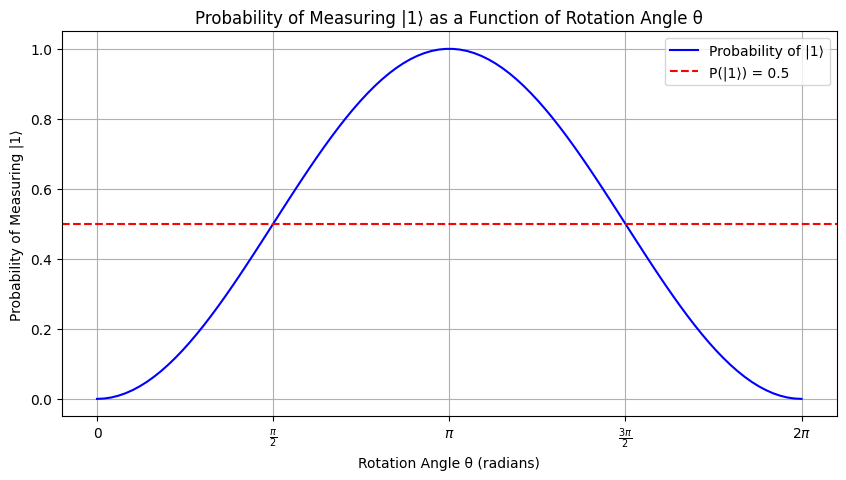

In [49]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np
import matplotlib.pyplot as plt


def create_quantum_circuit(theta):
    qc = QuantumCircuit(1)  # 1 qubit, no classical bit required for statevector simulation
    qc.rx(theta, 0)  # Apply rotation around the X-axis with angle theta
    return qc

# Simulating the quantum circuit and retrieve the probability of measuring |1⟩
def simulate_quantum_circuit(theta):
    qc = create_quantum_circuit(theta)

    # Simulating the quantum circuit using the Statevector class
    statevector = Statevector.from_instruction(qc)  # Get the statevector from the circuit

    # Probability of measuring |1⟩ is the square of the amplitude of the second state
    probability_of_1 = np.abs(statevector.data[1]) ** 2  # statevector.data gives the amplitudes
    return probability_of_1

theta_values = np.linspace(0, 2 * np.pi, 100)
probabilities = []


for theta in theta_values:
    probability = simulate_quantum_circuit(theta)
    probabilities.append(probability)

# results
plt.figure(figsize=(10, 5))
plt.plot(theta_values, probabilities, label='Probability of |1⟩', color='blue')
plt.title('Probability of Measuring |1⟩ as a Function of Rotation Angle θ')
plt.xlabel('Rotation Angle θ (radians)')
plt.ylabel('Probability of Measuring |1⟩')
plt.axhline(0.5, color='red', linestyle='--', label='P(|1⟩) = 0.5')
plt.legend()
plt.grid()
plt.xticks(np.arange(0, 2 * np.pi + 0.1, np.pi/2),
           ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.show()


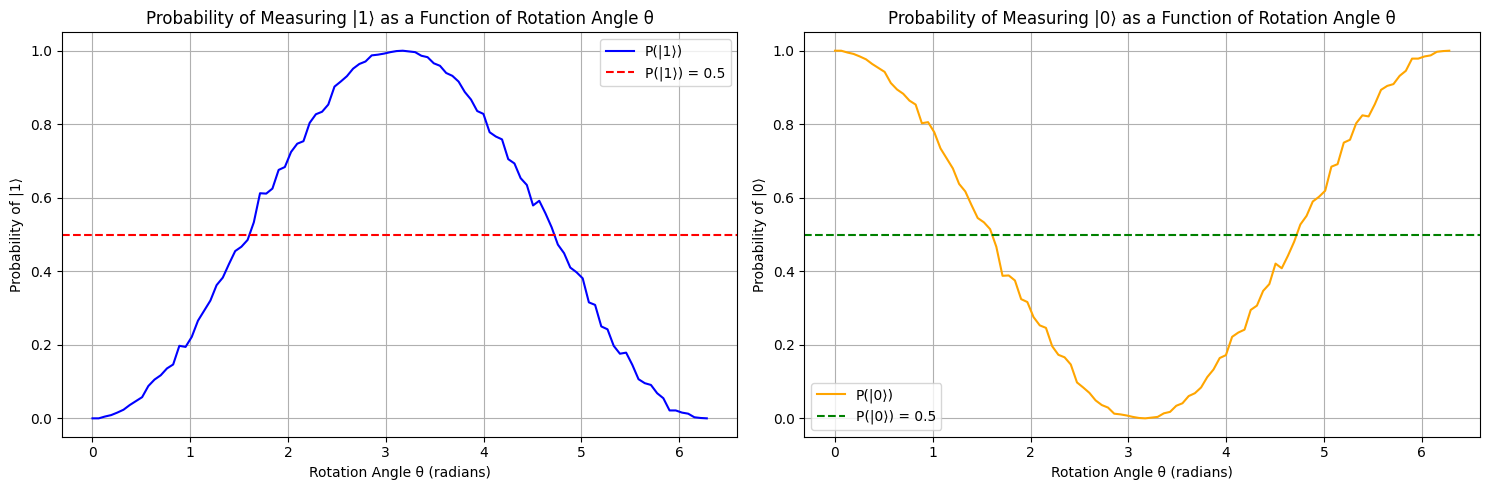

In [70]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt


def create_quantum_circuit(theta):
    qc = QuantumCircuit(1, 1)
    qc.rx(theta, 0)
    qc.measure(0, 0)
    return qc


def simulate_quantum_circuit(theta):
    qc = create_quantum_circuit(theta)


    backend = AerSimulator()
    transpiled_circuit = transpile(qc, backend)

    job = backend.run(transpiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    probability_of_1 = counts.get('1', 0) / 1024  # Probability of measuring |1⟩
    probability_of_0 = counts.get('0', 0) / 1024  # Probability of measuring |0⟩

    return probability_of_1, probability_of_0


theta_values = np.linspace(0, 2 * np.pi, 100)  # From 0 to 2π
probabilities_1 = []
probabilities_0 = []


for theta in theta_values:
    prob_1, prob_0 = simulate_quantum_circuit(theta)
    probabilities_1.append(prob_1)
    probabilities_0.append(prob_0)

# results
plt.figure(figsize=(15, 5))

# Probability of measuring |1⟩
plt.subplot(1, 2, 1)
plt.plot(theta_values, probabilities_1, label='P(|1⟩)', color='blue')
plt.title('Probability of Measuring |1⟩ as a Function of Rotation Angle θ')
plt.xlabel('Rotation Angle θ (radians)')
plt.ylabel('Probability of |1⟩')
plt.axhline(0.5, color='red', linestyle='--', label='P(|1⟩) = 0.5')
plt.legend()
plt.grid()

# Probability of measuring |0⟩
plt.subplot(1, 2, 2)
plt.plot(theta_values, probabilities_0, label='P(|0⟩)', color='orange')
plt.title('Probability of Measuring |0⟩ as a Function of Rotation Angle θ')
plt.xlabel('Rotation Angle θ (radians)')
plt.ylabel('Probability of |0⟩')
plt.axhline(0.5, color='green', linestyle='--', label='P(|0⟩) = 0.5')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()